In [1]:
#calcular parâmetros das galáxias
#EM CONSTRUÇÃO!
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from astropy.visualization import LogStretch
from matplotlib.colors import LogNorm
from astropy.modeling import models
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import photutils
import time
import statmorph
%matplotlib inline

log_stretch = LogStretch(a=10000.0)

def normalize(image):
    m, M = np.min(image), np.max(image)
    return (image-m) / (M-m)

Filename: teste1011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (141, 141)   float32   


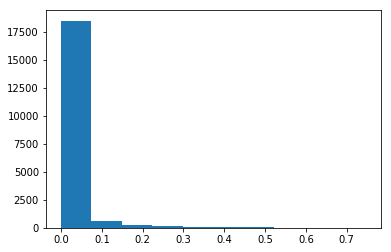

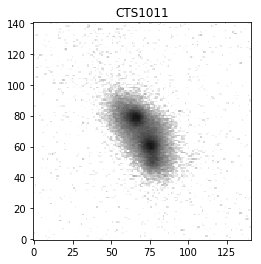

In [2]:
GHII = 'teste1011.fits'
image_star = 'teste1011_psf.fits'
weight= 'CTS1011weight.fits'

filename = get_pkg_data_filename(GHII)
fits.info(filename)

hdu = fits.open(filename)
#hdu.writeto( 'newtable.fits' )
image_data = hdu[0].data

NBINS = 10
histogram = plt.hist(image_data.flatten(), NBINS)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('CTS1011')
plt.imshow(image_data, origin='lower', cmap='gray_r',norm=LogNorm(vmin=0.025, vmax=1))

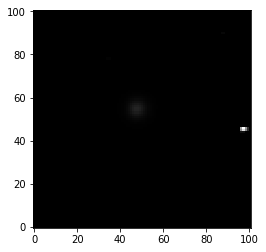

In [3]:
#Estrela PSF
psf = fits.open(image_star)
psf = psf[0].data
plt.imshow(psf, origin='lower', cmap='gray')

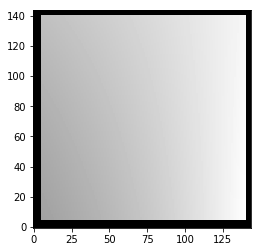

In [4]:
#mapa pixels
m_pixel = fits.open(weight)
m_pixel = m_pixel[0].data
plt.imshow(m_pixel, origin='lower', cmap='gray')

In [9]:
#convolução
image_data = ndi.convolve(image_data,psf,origin=[55,50])
plt.imshow(image_data, origin='lower', cmap='gray_r',norm=LogNorm(vmin=0.025, vmax=1))

ValueError: Invalid origin; origin must satisfy -(weights.shape[k] // 2) <= origin[k] <= (weights.shape[k]-1) // 2

In [10]:
threshold = photutils.detect_threshold(image_data, snr=1.5)
npixels = 1000  # minimum number of connected pixels
segm = photutils.detect_sources(image_data, threshold, npixels)

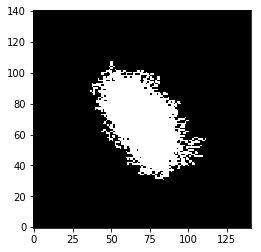

In [11]:
# Keep only the largest segment
label = np.argmax(segm.areas) + 1
segmap = segm.data == label
plt.imshow(segmap, origin='lower', cmap='gray')

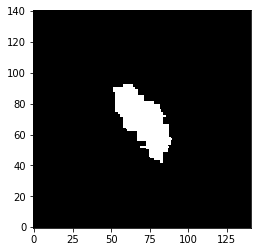

In [12]:
segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
segmap = segmap_float > 0.99
plt.imshow(segmap, origin='lower', cmap='gray')

In [13]:
#Agora que temos todos os dados necessários
gain=1000.0
start = time.time()
source_morphs = statmorph.source_morphology(image_data, segmap, gain=gain, psf=psf, eta=0.2) #Usando m_pixel=m_pixel não deu certo
print('Time: %g s.' % (time.time() - start))

Finished processing source 1.

Time: 0.829383 s.


In [14]:
morph = source_morphs[0]
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
print('ellipticity_centroid =', morph.ellipticity_centroid)
print('elongation_centroid =', morph.elongation_centroid)
print('orientation_centroid =', morph.orientation_centroid)
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('rpetro_circ =', morph.rpetro_circ)
print('rpetro_ellip =', morph.rpetro_ellip)
print('rhalf_circ =', morph.rhalf_circ)
print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r50 =', morph.r50)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
print('F(G, M20) =', morph.gini_m20_bulge)
print('S(G, M20) =', morph.gini_m20_merger)
print('sn_per_pixel =', morph.sn_per_pixel)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
print('sersic_ellip =', morph.sersic_ellip)
print('sersic_theta =', morph.sersic_theta)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)
print('r50 em arcseg =',morph.r50*0.161)
print('Retorna o eixo semi-principal da elipse mínima =',morph.rmax_ellip)
print('O eixo semi-principal de uma abertura elíptica contendo 50% da luz =',morph.rhalf_ellip) 

xc_centroid = 70.8333142291558
yc_centroid = 68.71341518786676
ellipticity_centroid = 0.6021047236553468
elongation_centroid = 2.513224105565429
orientation_centroid = -1.0100775098688812
xc_asymmetry = 70.64653130478558
yc_asymmetry = 69.25879003098535
ellipticity_asymmetry = 0.6023659344296917
elongation_asymmetry = 2.514875073808743
orientation_asymmetry = -1.0106390029833425
rpetro_circ = 32.40570607660336
rpetro_ellip = 43.53458724640214
rhalf_circ = 15.105726376351631
rhalf_ellip = 21.279670518443492
r20 = 8.963292939709625
r50 = 15.135249753182059
r80 = 25.476546210620583
Gini = 0.4844715303837006
M20 = -1.075024972404821
F(G, M20) = -0.816873618724141
S(G, M20) = 0.003198343915593427
sn_per_pixel = 5.568347
C = 2.2683648057110406
A = 0.026180889292536754
S = 0.005106864637218207
sersic_amplitude = 0.6835565379100477
sersic_rhalf = 17.565009649908223
sersic_n = 0.2915377414358258
sersic_xc = 73.59551704145356
sersic_yc = 62.74306138012591
sersic_ellip = 0.644774980027628
sersic_

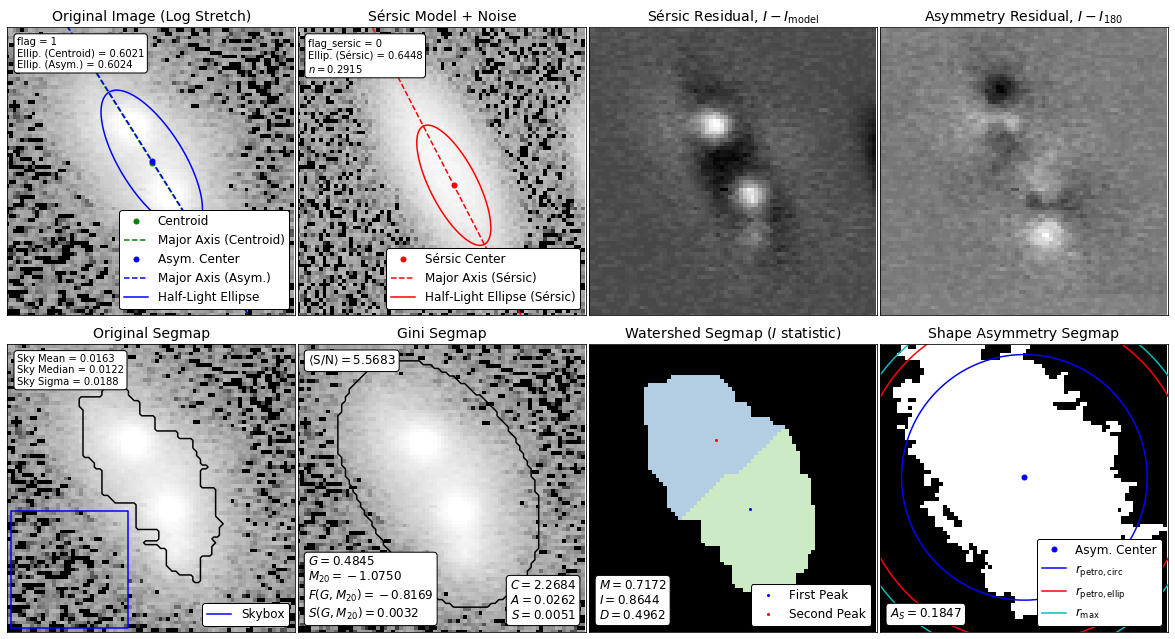

In [15]:
from statmorph.utils.image_diagnostics import make_figure
fig = make_figure(morph)
fig.savefig(GHII+'_morph.png', dpi=150)